# Exercise 2.  Crime Dataset (Regression)
The Crime Dataset contains **128 socio-economic features** from the US 1990 Census. The target is the crime rate per community.

Ref. : https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.names

Using the **crime_prep.csv** file :
1. Identify the variables that are the most highly correlated with the target
1. Apply either dimensionality reduction or feature selection on the dataset
1. Evaluate multiple regression algorithms to predict the crime rate.
1. Compare the performance of each model & identify the best performing one.
1. Present how your model generalizes and performs on unseen data.
<br></br>
<br></br>

# Communities and Crime Data Set

The data combines:
- socio-economic data from the 1990 US Census (***environment***),
- law enforcement data from the 1990 Law Enforcement Management and Administrative Statistics (LEMAS) survey (***enforcement***), 
- and crime data from the 1995 Federal Bureau of Investigation's (FBI) Uiniform Crime Report (UCR) (***crime***).

Attributes:

- $N=122$ 

References:

http://archive.ics.uci.edu/ml/datasets/Communities+and+Crime

Redmond, M. and Baveja, A., ***A data-driven software tool for enabling cooperative information sharing among police departments***, in European Journal of Operational Research 141 (2002) 660-678 (https://www.sciencedirect.com/science/article/pii/S0377221701002648)

## Rationale

Redmond and Baveja (2002) explored these databases to develop a Crime Similarity System (CSS). The goal of this system was to generate a list of matching cities or communities that have relevant similarity, allowing the law enforcement user to contact representatives of the retrieved cities or communities for discussions enabling dialog, discussion and possible learning.

After an identification phase, the authors aggregated the **factors** (features) into three *dimensions*:

1. environment
2. enforcement
3. crime

In [1]:
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
#%matplotlib inline

In [2]:
attrib = read_csv('attributes.csv', delim_whitespace = True)

In [3]:
data = read_csv('communities.data', names = attrib['attributes'])

In [4]:
print(data.shape)

(1994, 128)


In [5]:
data.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


Remove non-predictive features
- **state**: US state (by number) - not counted as predictive above, but if considered, should be considered nominal (nominal)
- **county**: numeric code for county - not predictive, and many missing values (numeric)
- **community**: numeric code for community - not predictive and many missing values (numeric)
- **communityname**: community name - not predictive - for information only (string)
- **fold**: fold number for non-random 10 fold cross validation, potentially useful for debugging, paired tests - not predictive (numeric)

In [6]:
data = data.drop(columns=['state','county',
                          'community','communityname',
                          'fold'], axis=1)
data.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [7]:
from pandas import DataFrame

data = data.replace('?', np.nan)
feat_miss = data.columns[data.isnull().any()]

In [8]:
print(feat_miss)
feat_miss.shape

Index(['OtherPerCap', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop',
       'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol',
       'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian',
       'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
       'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'PolicBudgPerPop'],
      dtype='object')


(23,)

$\Longrightarrow$ From 122 predictive features 23 contain missing values.

In [9]:
# Look at the features with missing values

data[feat_miss[0:13]].describe()

,OtherPerCap,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp
count,1993,319,319,319,319,319,319,319,319,319,319,319,319
unique,97,38,52,34,55,44,59,75,52,76,74,73,54
top,0,0.02,0.2,0.98,0.14,0.02,0.14,0.23,0.2,0.78,0.97,0,0
freq,129,80,19,81,17,55,23,15,19,12,11,23,72


In [10]:
data[feat_miss[13:23]].describe()

,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,PolicBudgPerPop
count,319,319,319,319,319,319,319,319,319,319
unique,50,72,30,15,77,63,38,72,3,51
top,0,0.07,0.03,0.57,0.19,0.02,0.02,0.84,0,0.12
freq,189,14,48,54,12,27,69,13,126,22


**OtherPerCap** has only one missing value and will be filled by a mean value using Imputer from sklearn.preprocessing. The others features present many missing values and will be removed from the data set.

In [11]:
# Impute mean values for samples with missing values

from sklearn.preprocessing import Imputer

imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)

imputer = imputer.fit(data[['OtherPerCap']])
data[['OtherPerCap']] = imputer.transform(data[['OtherPerCap']])

#imputer = imputer.fit(data[feat_miss])
#data[feat_miss] = imputer.transform(data[feat_miss])
#data[feat_miss].describe()

In [12]:
data = data.dropna(axis=1)
print(data.shape)
data.head()

(1994, 101)


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03


In [13]:
data.describe()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,0.336264,0.423164,...,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.094052,0.237979
std,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,0.166505,0.179185,...,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.240328,0.232985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,0.250000,0.300000,...,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,0.290000,0.420000,...,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000
75%,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,0.360000,0.530000,...,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**ViolentCrimesPerPop**: total number of violent crimes per 100K popuation (numeric - decimal) GOAL attribute (to be predicted)

The per capita violent crimes variable was calculated using population and the sum of crime variables considered violent crimes in the United States: murder, rape, robbery, and assault. There was apparently some controversy in some states concerning the counting of rapes. These resulted in missing values for rape, which resulted in incorrect values for per capita violent crime. These cities are not included in the dataset. Many of these omitted communities were from the midwestern USA.

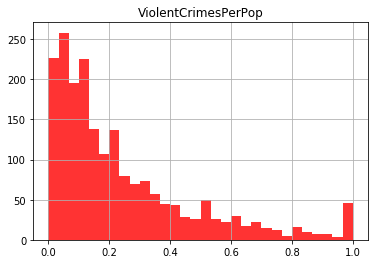

In [14]:
data.hist(column = ['ViolentCrimesPerPop'], bins = 30, color = 'red', alpha = 0.8)
plt.show()

## Correlations

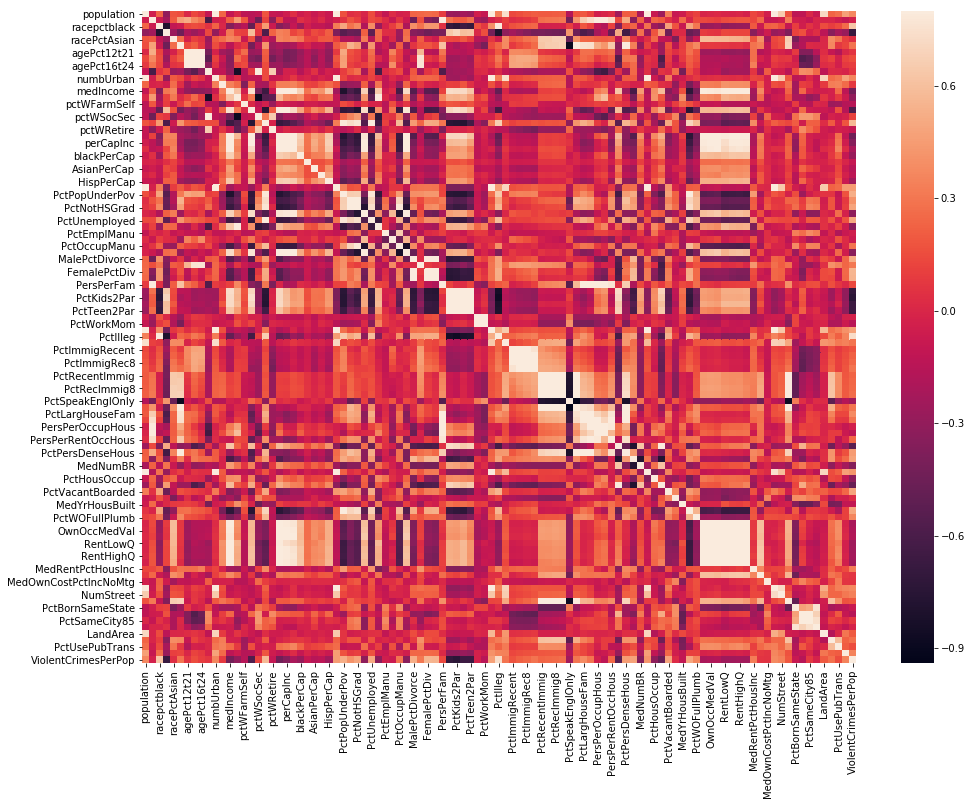

In [15]:
import seaborn as sns

corrmat = data.corr()
fig = plt.figure(figsize = (16, 12))

sns.heatmap(corrmat, vmax = 0.8)
plt.show()

In [16]:
corrT = data.corr(method = 'pearson').round(4)
corrT = corrT.sort_values(by=['ViolentCrimesPerPop'])
corrT['ViolentCrimesPerPop']

PctKids2Par           -0.7384
PctFam2Par            -0.7067
racePctWhite          -0.6848
PctYoungKids2Par      -0.6661
PctTeen2Par           -0.6616
pctWInvInc            -0.5763
PctPersOwnOccup       -0.5255
PctHousOwnOcc         -0.4707
medFamInc             -0.4391
medIncome             -0.4242
MedNumBR              -0.3574
perCapInc             -0.3521
PctOccupMgmtProf      -0.3391
PctEmploy             -0.3316
PctHousOccup          -0.3190
PctBSorMore           -0.3147
pctWWage              -0.3055
blackPerCap           -0.2754
RentLowQ              -0.2518
HispPerCap            -0.2446
PctSpeakEnglOnly      -0.2415
RentMedian            -0.2405
MedRent               -0.2399
RentHighQ             -0.2323
OwnOccLowQuart        -0.2105
whitePerCap           -0.2093
OwnOccMedVal          -0.1907
OwnOccHiQuart         -0.1721
AsianPerCap           -0.1556
PctSameHouse85        -0.1554
                        ...  
PctLargHouseOccup      0.2948
PctOccupManu           0.2956
PctNotSpea

## Dimensionality Reduction - Principal Component Analysis (PCA)

The dataset contain many variables highly correlated. Multicolinearity will increase the model variance. Dimensionality reduction utilizing PCA can provide an optimal set of orthogonal features. Let's adopt the criterion in which we select those principal components responsible to explain more than a unit variance ("eigenvalue one criterion").

In [17]:
X = data.iloc[:, 0:100].values
y = data.iloc[:, 100].values

from sklearn.model_selection import train_test_split

seed = 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = seed)

print(X.shape)
print(y.shape)

(1994, 100)
(1994,)


In [18]:
from sklearn.preprocessing import StandardScaler

# Standardize features by removing the mean and scaling to unit variance

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Amount of variance: [25.20144365 16.45250595  9.49203575  7.5706022   5.82744091  4.29215462
  3.35028826  2.87773899  2.05180853  1.57897723  1.55962549  1.46870006
  1.38910467  1.03136815]
Sum of the variance: 84.14
Percentage of variance: [0.25183378 0.16440712 0.09485231 0.07565175 0.05823264 0.04289078
 0.03347887 0.02875676 0.02050338 0.01577845 0.01558507 0.01467647
 0.01388109 0.01030629]
Sum of the percentage of variance: 0.84


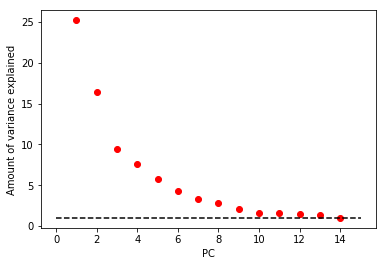

(1395, 14)


In [19]:
from sklearn.decomposition import PCA

c = 14
pca = PCA(n_components = c)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print("Amount of variance: %s" % pca.explained_variance_)
print("Sum of the variance: %s" % sum(pca.explained_variance_).round(2))

print("Percentage of variance: %s" % pca.explained_variance_ratio_)
print("Sum of the percentage of variance: %s" % sum(pca.explained_variance_ratio_).round(2))


plt.scatter(np.arange(1,(c+1)),pca.explained_variance_, c = 'red')
plt.plot((0,15), (1,1), color = 'black', linestyle = 'dashed')
plt.xlabel('PC')
plt.ylabel('Amount of variance explained')
plt.show()
print(X_train.shape)

## Model Selection - Cross Validation

In [20]:
def myplot(XX, yy):
    from sklearn.model_selection import ShuffleSplit
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import make_scorer
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=seed)

    results = []
    names = []

    for name, model in models:
        cv_results = cross_val_score(model, XX, yy, cv = cv, scoring = make_scorer(r2_score))
        results.append(cv_results)
        names.append(name)
        msg = "%s: %.3f (+/- %.3f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

    fig = plt.figure()
    fig.suptitle('R2')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = []
models.append(('LR', LinearRegression()))
models.append(('SVR', SVR()))
models.append(('DTR', DecisionTreeRegressor(random_state=seed)))
models.append(('RFR (100 Trees)', RandomForestRegressor(n_estimators=100, random_state=seed)))

LR: 0.643 (+/- 0.028)
SVR: 0.408 (+/- 0.035)
DTR: 0.224 (+/- 0.093)
RFR (100 Trees): 0.608 (+/- 0.023)


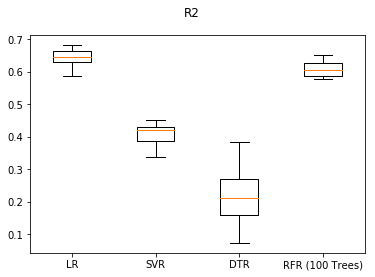

In [22]:
myplot(X_train, y_train)

Scores results ($R^2$, MSE and MAE) of the cross-validation indicate that **Linear Regression** has the best performance among the analyzed models and will be used for generalization. This approach is also called **Principal Component Regression**, i.e. a set of principal components, $Z_1,..., Z_M$ are used as the predictors in a linear regression model.

## Generalizing the performance - removing some outliers with RANSAC

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor

#model = LinearRegression(fit_intercept=True)
model = RANSACRegressor(LinearRegression(),
                         max_trials=100,
                         min_samples=50,
                         loss='absolute_loss',
                         residual_threshold=0.55,
                         random_state=seed)


model.fit(X_train, y_train)

y_pred = model.predict(X_train)
# Correction: y_pred (per capita violent crimes) can not assume negative values
y_pred[y_pred < 0] = 0

K = X_train.shape[1]+1
rms = np.sqrt(sum((y_train-y_pred)**2)/(len(y_train)-K))

Let's include here the (unbiased) standard deviation of the error term as an additional estimator (after corrections for y_pred < 0):

$$rms = \hat\sigma = \sqrt{\frac{\sum\hat{e}_i^{2}}{N-K}},$$

where $K = 15$ is the number of regression parameters (one intercept plus 14 angular coefficients). Scikit-learn computes MSE as

$$MSE = \hat\sigma_{biased}^{2} = \frac{\sum\hat{e}_i^{2}}{N}$$

and MAE as

$$MAE = \frac{\sum\hat{e}_i}{N},$$

where $$\hat{e}_i = \left|y_i - \hat{y}_i\right|.$$

R^2: 0.6505
MSE: 0.0191
MAE: 0.0965
rms: 0.1388


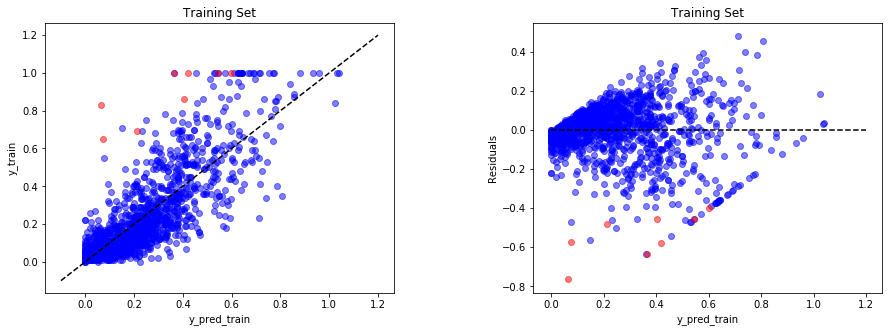

In [24]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('R^2: %.4f' % r2_score(y_train,y_pred))
print('MSE: %.4f' % mean_squared_error(y_train,y_pred))
print('MAE: %.4f' % mean_absolute_error(y_train,y_pred))
print('rms: %.4f' % rms)

inlier_mask = model.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

plt.figure(figsize=(15, 10))
ax1 = plt.subplot(121)
ax1.scatter(y_pred[inlier_mask], y_train[inlier_mask], c = 'blue', alpha = 0.5)
ax1.scatter(y_pred[outlier_mask], y_train[outlier_mask], c = 'red', alpha = 0.5)
ax1.plot((-0.1,1.2),(-0.1,1.2), c = 'black', linestyle = 'dashed')
ax1.set_title('Training Set')
ax1.set_xlabel('y_pred_train')
ax1.set_ylabel('y_train')

ax2 = plt.subplot(122)
ax2.scatter(y_pred[inlier_mask], y_pred[inlier_mask] - y_train[inlier_mask], c = 'blue', alpha = 0.5)
ax2.scatter(y_pred[outlier_mask], y_pred[outlier_mask] - y_train[outlier_mask], c = 'red', alpha = 0.5)
ax2.plot((0,1.2),(0,0), c = 'black', linestyle = 'dashed')
ax2.set_title('Training Set')
ax2.set_xlabel('y_pred_train')
ax2.set_ylabel('Residuals')

plt.subplots_adjust(wspace=0.4, top=0.5)
plt.show()

R^2: 0.6251
MSE: 0.0201
MAE: 0.0976
rms: 0.1436


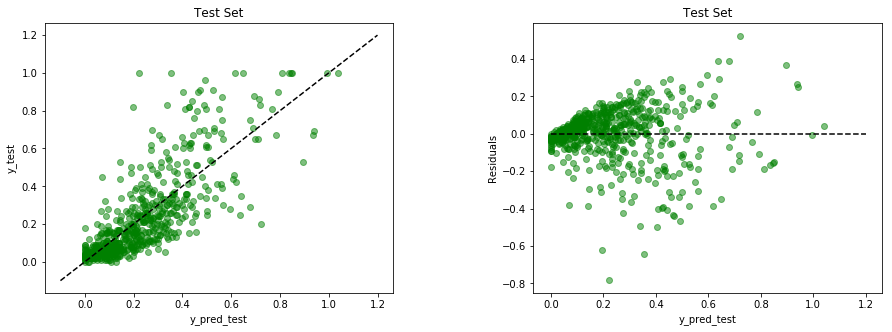

In [25]:
y_pred_test = model.predict(X_test)
# Correction: y_pred (per capita violent crimes) can not assume negative values
y_pred_test[y_pred_test < 0] = 0

nrp = X_test.shape[1]+1
rms = np.sqrt(sum((y_test-y_pred_test)**2)/(len(y_test)-nrp))

print('R^2: %.4f' % r2_score(y_test,y_pred_test))
print('MSE: %.4f' % mean_squared_error(y_test,y_pred_test))
print('MAE: %.4f' % mean_absolute_error(y_test,y_pred_test))
print('rms: %.4f' % rms)

plt.figure(figsize=(15, 10))
ax1 = plt.subplot(121)
ax1.scatter(y_pred_test, y_test, c = 'green', alpha = 0.5)
ax1.plot((-0.1,1.2),(-0.1,1.2), c = 'black', linestyle = 'dashed')
ax1.set_title('Test Set')
ax1.set_xlabel('y_pred_test')
ax1.set_ylabel('y_test')

ax2 = plt.subplot(122)
ax2.scatter(y_pred_test, y_pred_test - y_test, c = 'green', alpha = 0.5)
ax2.plot((0,1.2),(0,0), c = 'black', linestyle = 'dashed')
ax2.set_title('Test Set')
ax2.set_xlabel('y_pred_test')
ax2.set_ylabel('Residuals')

plt.subplots_adjust(wspace=0.4, top=0.5)
plt.show()

In this first approach using PCR and 14 predictors we obtained an rms = 0.144 (MSE = 0.020) on predicting **ViolentCrimesPerPop** (total number of violent crimes per 100K popuation normalized into the decimal range 0.00-1.00) for an unseen data set. Evaluated on the training data the model performance is $R^2$ = 0.642 $\pm$ 0.028 using cross-validation.

Interpretation of the socio-economic factors that help explain violent crimes in communities is not possible since the original features were transformed in PCA.

# Subset Selection vs. Dimensionality Reduction
## Univariate Feature Selection vs. PCA

In [26]:
X = data.iloc[:, 0:100].values
y = data.iloc[:, 100].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = seed)

In [27]:
from sklearn.preprocessing import StandardScaler

# Standardize features by removing the mean and scaling to unit variance

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

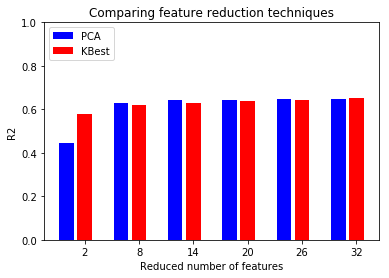

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import ShuffleSplit
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression


pipe = Pipeline([('reduce_dim', PCA()), 
                 ('regressor', LinearRegression())])

N_FEATURES_OPTIONS = [2, 8, 14, 20, 26, 32]

param_grid = [
    {
        'reduce_dim': [PCA()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
    },
    {
        'reduce_dim': [SelectKBest(mutual_info_regression)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
    },
]

reducer_labels = ['PCA', 'KBest']

cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=seed)

grid = GridSearchCV(pipe, cv=cv, n_jobs=1, param_grid=param_grid)
grid.fit(X_train, y_train)

mean_scores = np.array(grid.cv_results_['mean_test_score'])
mean_scores = mean_scores.reshape(-1, len(N_FEATURES_OPTIONS))
bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) *
               (len(reducer_labels) + 1) + .5)

plt.figure()
COLORS = 'br'
for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label=label, color=COLORS[i])

plt.title("Comparing feature reduction techniques")
plt.xlabel('Reduced number of features')
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel('R2')
plt.ylim((0, 1))
plt.legend(loc='upper left')
plt.show()

In [29]:
mean_scores

array([[0.44704963, 0.62801915, 0.64170231, 0.64314253, 0.64791202,
        0.6481847 ],
       [0.57759774, 0.6199785 , 0.63064069, 0.63965798, 0.64429047,
        0.65226748]])

The result shows that univariate feature selection based on a scoring function, such as **mutual information** (or even F-values) did not perform better than PCA as a subset selection method of predictors of **ViolentCrimesPerPop**.

# Subset Selection
## Recursive Feature Elimination with cross-validation

In [30]:
X = data.iloc[:, 0:100].values
y = data.iloc[:, 100].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = seed)

from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LinearRegression

cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=seed)

estimator = LinearRegression()
selector = RFECV(estimator, step=1, cv=cv, scoring = 'r2')
selector = selector.fit(X_train, y_train)

In [31]:
print("Optimal number of features : %d" % selector.n_features_)
mask = selector.get_support()

Optimal number of features : 33


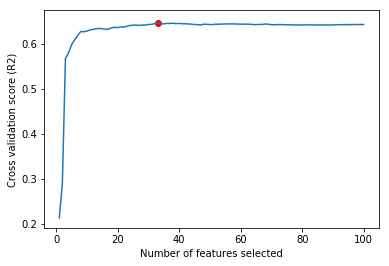

In [32]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (R2)")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.scatter(selector.n_features_,np.max(selector.grid_scores_), c = 'red')
plt.show()

In [33]:
# Applying the mask
X_train = X_train[:, mask]
X_test = X_test[:, mask]

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = []
models.append(('LR', LinearRegression()))
models.append(('SVR', SVR()))
models.append(('DTR', DecisionTreeRegressor(random_state=seed)))
models.append(('RFR (100 Trees)', RandomForestRegressor(n_estimators=100, random_state=seed)))

LR: 0.664 (+/- 0.026)
SVR: 0.660 (+/- 0.023)
DTR: 0.269 (+/- 0.084)
RFR (100 Trees): 0.649 (+/- 0.026)


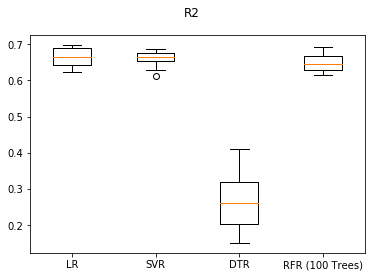

In [35]:
myplot(X_train, y_train)

## Generalizing the performance - removing some outliers with RANSAC

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(LinearRegression(),
                         max_trials=100,
                         min_samples=50,
                         loss='absolute_loss',
                         residual_threshold=0.55,
                         random_state=seed)


model.fit(X_train, y_train)

y_pred = model.predict(X_train)
# Correction: y_pred (per capita violent crimes) can not assume negative values
y_pred[y_pred < 0] = 0

K = X_train.shape[1]+1
rms = np.sqrt(sum((y_train-y_pred)**2)/(len(y_train)-K))

R^2: 0.6767
MSE: 0.0176
MAE: 0.0922
rms: 0.1344


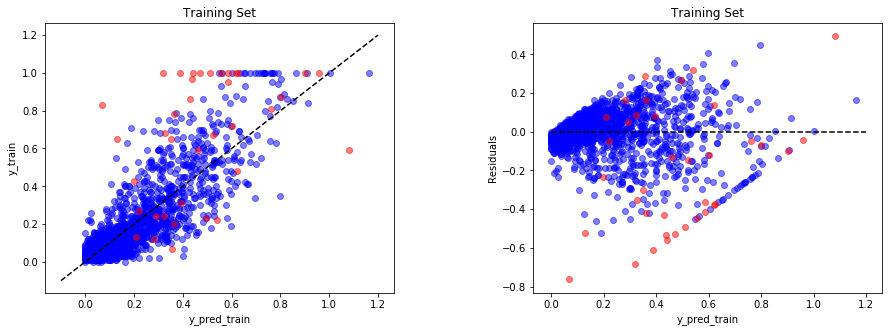

In [37]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('R^2: %.4f' % r2_score(y_train,y_pred))
print('MSE: %.4f' % mean_squared_error(y_train,y_pred))
print('MAE: %.4f' % mean_absolute_error(y_train,y_pred))
print('rms: %.4f' % rms)

inlier_mask = model.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

plt.figure(figsize=(15, 10))
ax1 = plt.subplot(121)
ax1.scatter(y_pred[inlier_mask], y_train[inlier_mask], c = 'blue', alpha = 0.5)
ax1.scatter(y_pred[outlier_mask], y_train[outlier_mask], c = 'red', alpha = 0.5)
ax1.plot((-0.1,1.2),(-0.1,1.2), c = 'black', linestyle = 'dashed')
ax1.set_title('Training Set')
ax1.set_xlabel('y_pred_train')
ax1.set_ylabel('y_train')

ax2 = plt.subplot(122)
ax2.scatter(y_pred[inlier_mask], y_pred[inlier_mask] - y_train[inlier_mask], c = 'blue', alpha = 0.5)
ax2.scatter(y_pred[outlier_mask], y_pred[outlier_mask] - y_train[outlier_mask], c = 'red', alpha = 0.5)
ax2.plot((0,1.2),(0,0), c = 'black', linestyle = 'dashed')
ax2.set_title('Training Set')
ax2.set_xlabel('y_pred_train')
ax2.set_ylabel('Residuals')

plt.subplots_adjust(wspace=0.4, top=0.5)
plt.show()

R^2: 0.6544
MSE: 0.0185
MAE: 0.0938
rms: 0.1402


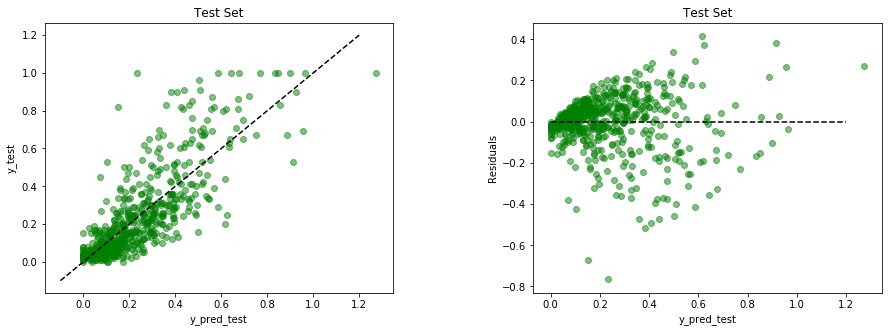

In [38]:
y_pred_test = model.predict(X_test)
# Correction: y_pred (per capita violent crimes) can not assume negative values
y_pred_test[y_pred_test < 0] = 0

nrp = X_test.shape[1]+1
rms = np.sqrt(sum((y_test-y_pred_test)**2)/(len(y_test)-nrp))

print('R^2: %.4f' % r2_score(y_test,y_pred_test))
print('MSE: %.4f' % mean_squared_error(y_test,y_pred_test))
print('MAE: %.4f' % mean_absolute_error(y_test,y_pred_test))
print('rms: %.4f' % rms)

plt.figure(figsize=(15, 10))
ax1 = plt.subplot(121)
ax1.scatter(y_pred_test, y_test, c = 'green', alpha = 0.5)
ax1.plot((-0.1,1.2),(-0.1,1.2), c = 'black', linestyle = 'dashed')
ax1.set_title('Test Set')
ax1.set_xlabel('y_pred_test')
ax1.set_ylabel('y_test')

ax2 = plt.subplot(122)
ax2.scatter(y_pred_test, y_pred_test - y_test, c = 'green', alpha = 0.5)
ax2.plot((0,1.2),(0,0), c = 'black', linestyle = 'dashed')
ax2.set_title('Test Set')
ax2.set_xlabel('y_pred_test')
ax2.set_ylabel('Residuals')

plt.subplots_adjust(wspace=0.4, top=0.5)
plt.show()

**Conclusion**: Feature ranking with recursive feature elimination showed to be the best method analysed to select predictors of **ViolentCrimesPerPop**. The best generalization on the test set was obtained using a robust linear regression estimator (RANSAC). The minimum rms = 0.140 (MSE = 0.019) was obtained for $R^2$ = 0.654 on the test set.

A possible improvement could be achieved from the analysis of multicollinearity in the 33 features set and feature transformation. A starting point could be the analysis of the correlation matrix shown bellow.

No socio-economic discussion is done here, however the selected factors shown bellow can provide insights into the problem of violent crimes in US communities.

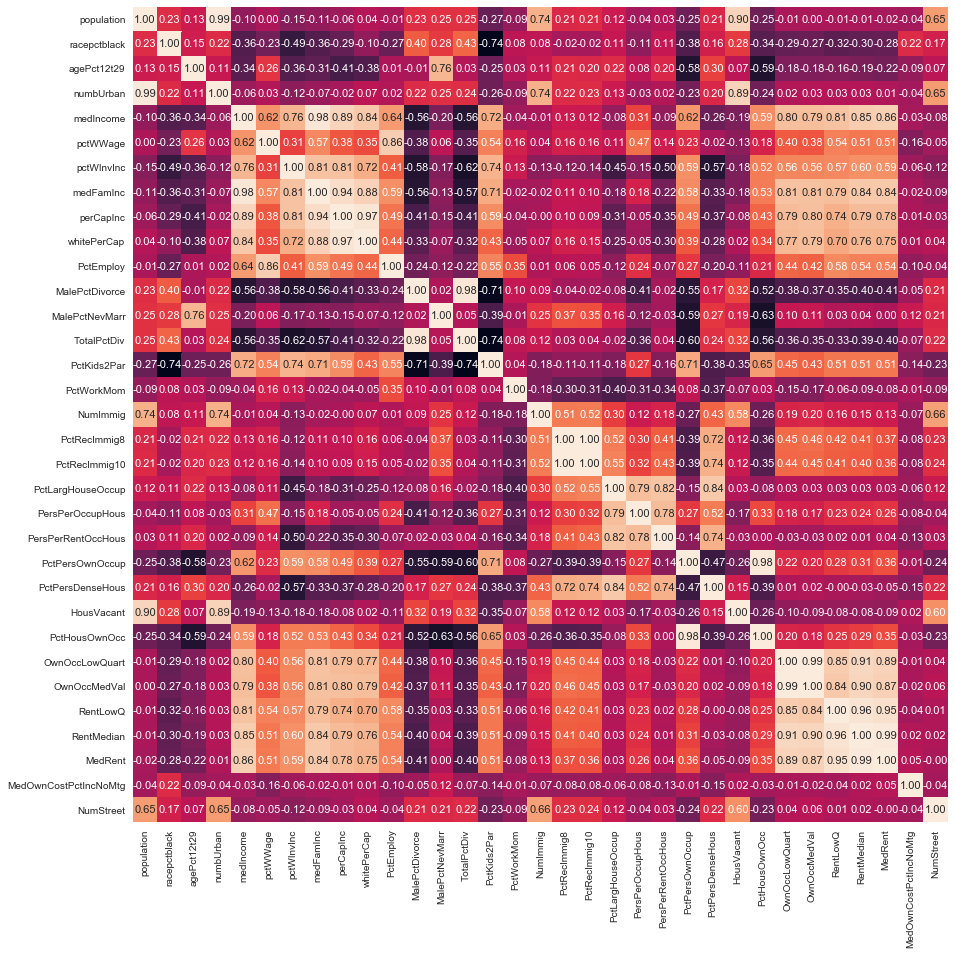

['population',
 'racepctblack',
 'agePct12t29',
 'numbUrban',
 'medIncome',
 'pctWWage',
 'pctWInvInc',
 'medFamInc',
 'perCapInc',
 'whitePerCap',
 'PctEmploy',
 'MalePctDivorce',
 'MalePctNevMarr',
 'TotalPctDiv',
 'PctKids2Par',
 'PctWorkMom',
 'NumImmig',
 'PctRecImmig8',
 'PctRecImmig10',
 'PctLargHouseOccup',
 'PersPerOccupHous',
 'PersPerRentOccHous',
 'PctPersOwnOccup',
 'PctPersDenseHous',
 'HousVacant',
 'PctHousOwnOcc',
 'OwnOccLowQuart',
 'OwnOccMedVal',
 'RentLowQ',
 'RentMedian',
 'MedRent',
 'MedOwnCostPctIncNoMtg',
 'NumStreet']

In [39]:
cols = list(data.iloc[:, 0:100].columns[mask])
cm = np.corrcoef(data[cols].values.T)

fig = plt.figure(figsize = (15, 15))
sns.set(font_scale=1)
hm = sns.heatmap(cm,
                 cbar=False,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 11},
                 yticklabels=cols,
                 xticklabels=cols)
plt.show()
cols